In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.08932004],
       [2.9649082 ]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.08932004],
       [10.01913644]])

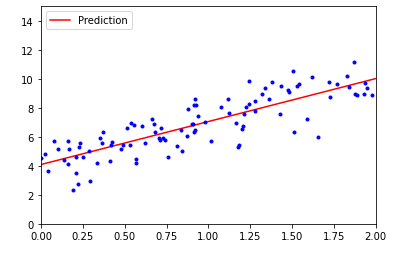

In [21]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.xlabel("X1", color="w")
plt.ylabel("y", color="w")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.08932004]), array([[2.9649082]]))

In [24]:
lin_reg.predict(X_new), y_predict

(array([[ 4.08932004],
        [10.01913644]]),
 array([[ 4.08932004],
        [10.01913644]]))

In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08932004],
       [2.9649082 ]])

In [29]:
np.linalg.pinv(X_b).dot(y)

array([[4.08932004],
       [2.9649082 ]])

In [45]:
eta = 0.1
n_iterations = 1000
m = 100

for interation in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta, theta_best

(array([[4.08932004],
        [2.9649082 ]]),
 array([[4.08932004],
        [2.9649082 ]]))

In [34]:
np.random.randn(2,1)

array([[ 0.37276417],
       [-0.84567156]])

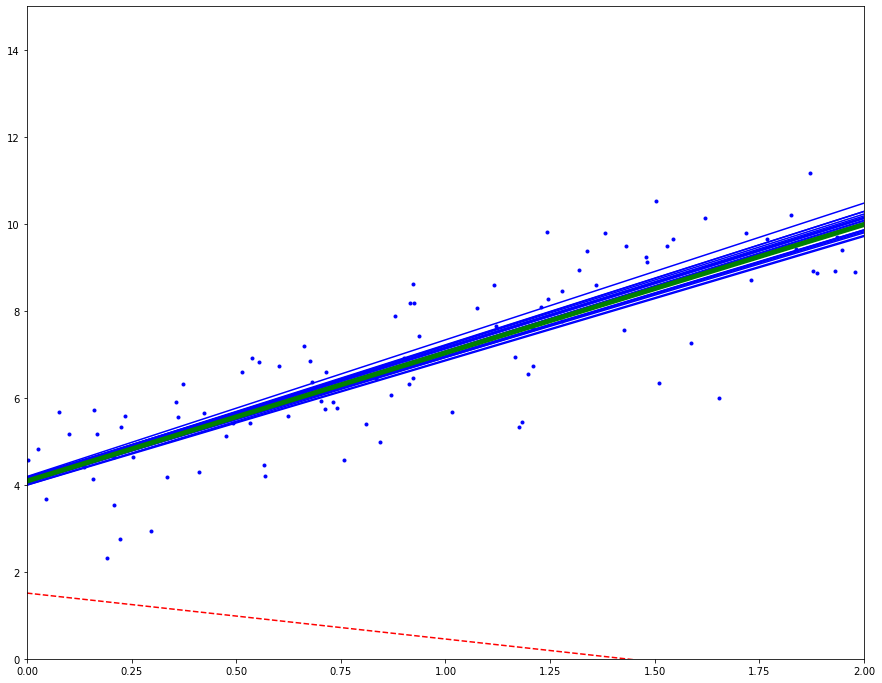

array([[4.0880955 ],
       [2.94853469]])

In [92]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
m = 100
xx = np.array([[0],[2]])
xxb = np.c_[np.ones((2,1)),xx]

plt.figure(figsize=(15,12))
plt.plot(X,y,"b.")
plt.plot([[0],[2]],theta,"r--")
plt.axis([0, 2.0, 0, 15])
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    if epoch <= 20:
        plt.plot(xx, xxb.dot(theta),"b-")
#plt.plot([[0],[2]],theta)
plt.plot(xx, xxb.dot(theta), "g-", linewidth=5)
plt.show()
theta

In [79]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10177398]), array([3.02269945]))

In [81]:
sgd_reg.predict(X_new)

array([ 4.10177398, 10.14717288])

In [1]:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([1.        , 0.52091224, 0.27134956])

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.17573857]), array([[0.        , 0.89364904, 0.44337898]]))

In [4]:
y_predicted = lin_reg.predict(X_poly)

In [5]:
X_sorted = sorted(X)
X_poly_sorted = poly_features.fit_transform(X_sorted)
X_poly_sorted[0]
X_sorted = np.array(X_sorted)
y_sorted = 0.5 * X_sorted ** 2 + X_sorted + 2 + np.random.randn(m, 1)

In [6]:
poly_features.get_feature_names()

['1', 'x0', 'x0^2']

In [7]:
lin_reg.fit(X_poly_sorted, y_sorted)
y_sorted_predicted = lin_reg.predict(X_poly_sorted)

(-3.0, 3.0, 0.0, 10.0)

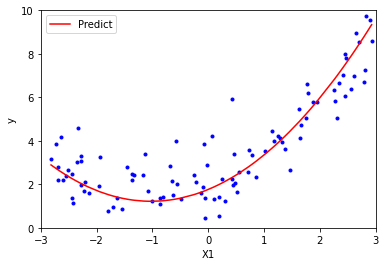

In [8]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("X1")
plt.ylabel("y")
plt.plot(X_sorted, y_sorted_predicted, "r-", label="Predict")
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3, label="validation set")
    plt.xlabel("Train set size")
    plt.ylabel("RMSE")
    plt.legend(loc="upper right")

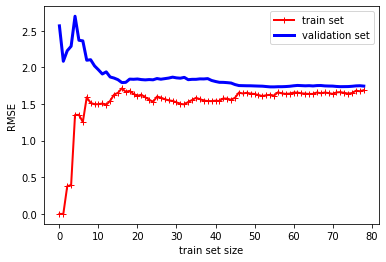

In [44]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 80.0, 0.0, 3.0)

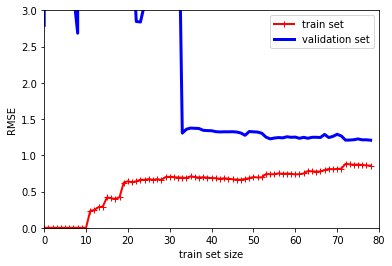

In [48]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

In [63]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0, solver="cholesky")
ridge_reg.fit(X_poly_sorted, y_sorted)
#ridge_reg.predict([[1.5]])
ridge_reg.intercept_, ridge_reg.coef_

(array([2.07837097]), array([[1.01924571, 0.5201595 ]]))

In [64]:
y_sorted_predict = ridge_reg.predict(X_poly_sorted)

In [68]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_poly_sorted, y_sorted.ravel())
y_sgdreg_sorted_predict = sgd_reg.predict(X_poly_sorted)

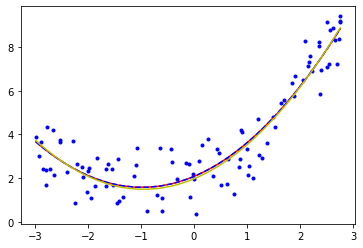

In [70]:
plt.plot(X_sorted, y_sorted, "b.")
plt.plot(X_sorted, y_sorted_predict, "r-")
plt.plot(X_sorted, y_sorted_predicted, "b--")
plt.plot(X_sorted, y_sgdreg_sorted_predict, "y-")
plt.show()

In [1]:
minimum_val_error = float("inf")
minimum_val_error

inf

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

In [8]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [16]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
import numpy as np

X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

/home/taesan/.local/lib/python3.8/site-packages/matplotlib/patches.py:1324: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


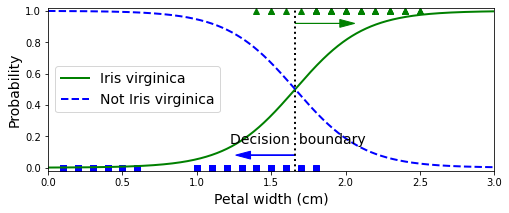

In [47]:
import matplotlib.pyplot as pl

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("logistic_regression_plot")
plt.show()

In [48]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

In [58]:
log_reg.predict([[1.67]])

array([1])

In [65]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [66]:
softmax_reg.predict([[5, 2]])

array([2])

In [68]:
softmax_reg.predict_proba([[5, 2]]) * 100

array([[6.38014896e-05, 5.74929995e+00, 9.42506362e+01]])